In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
# 그래프 설정.
plt.rcParams['font.family'] = 'Malgun Gothic'
# plt.rcParams['font.family'] = 'AppleGothic'

import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense

# String Encoding.
from sklearn.preprocessing import LabelEncoder

# split
from sklearn.model_selection import train_test_split, KFold, StratifiedKFold

# 다중분류를 위한 핫-윈 인코더.
from keras.utils import to_categorical

# 평가.
from sklearn.metrics import accuracy_score

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Sed 설정.
np.random.seed(3)
tf.random.set_seed(3)

In [3]:
# 데이터 읽기.
df = pd.read_csv('data/sonar.csv', header=None)
df.head(10)

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R
5,0.0286,0.0453,0.0277,0.0174,0.0384,0.0990,0.1201,0.1833,0.2105,0.3039,...,0.0045,0.0014,0.0038,0.0013,0.0089,0.0057,0.0027,0.0051,0.0062,R
6,0.0317,0.0956,0.1321,0.1408,0.1674,0.1710,0.0731,0.1401,0.2083,0.3513,...,0.0201,0.0248,0.0131,0.0070,0.0138,0.0092,0.0143,0.0036,0.0103,R
7,0.0519,0.0548,0.0842,0.0319,0.1158,0.0922,0.1027,0.0613,0.1465,0.2838,...,0.0081,0.0120,0.0045,0.0121,0.0097,0.0085,0.0047,0.0048,0.0053,R
8,0.0223,0.0375,0.0484,0.0475,0.0647,0.0591,0.0753,0.0098,0.0684,0.1487,...,0.0145,0.0128,0.0145,0.0058,0.0049,0.0065,0.0093,0.0059,0.0022,R
9,0.0164,0.0173,0.0347,0.0070,0.0187,0.0671,0.1056,0.0697,0.0962,0.0251,...,0.0090,0.0223,0.0179,0.0084,0.0068,0.0032,0.0035,0.0056,0.0040,R


In [4]:
# 데이터 정보 확인.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 208 entries, 0 to 207
Data columns (total 61 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       208 non-null    float64
 1   1       208 non-null    float64
 2   2       208 non-null    float64
 3   3       208 non-null    float64
 4   4       208 non-null    float64
 5   5       208 non-null    float64
 6   6       208 non-null    float64
 7   7       208 non-null    float64
 8   8       208 non-null    float64
 9   9       208 non-null    float64
 10  10      208 non-null    float64
 11  11      208 non-null    float64
 12  12      208 non-null    float64
 13  13      208 non-null    float64
 14  14      208 non-null    float64
 15  15      208 non-null    float64
 16  16      208 non-null    float64
 17  17      208 non-null    float64
 18  18      208 non-null    float64
 19  19      208 non-null    float64
 20  20      208 non-null    float64
 21  21      208 non-null    float64
 22  22

In [5]:
# 결측치 확인.
df.isna().sum()

0     0
1     0
2     0
3     0
4     0
     ..
56    0
57    0
58    0
59    0
60    0
Length: 61, dtype: int64

In [6]:
# 특성 데이터와 타겟 데이터 분할.
x = df.drop(60, axis=1)
y = df[60]

# 문자열 데이터 y를 숫자로 변환.
encoder = LabelEncoder()
encoder.fit(y)
y = encoder.transform(y)
y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [7]:
# k-fold를 이용한 교차 검증(Cross Validation)
# 시행 목적 : 과소 과대 적합문제를 방지.
# k-fold 생성.
# 10개의 dataset으로 분할.
n_fold = 10
skf = StratifiedKFold(n_splits=n_fold, shuffle=True, random_state=7)

In [8]:
# 예측 정확도를 담을 리스트.
Train_result_List = []
Test_result_List  = []

# < 모델의 설정, 컴파일, 실행 >
for train_idx, test_idx in skf.split(x, y) :
    # print(x.loc[train_idx])
    # 모델 설정.
    model = Sequential()

    # 60개의 노드로 이루어진 1개의 입력층과 2개의 은닉층 설정.
    model.add(Dense(24, input_dim=60, activation='relu'))
    model.add(Dense(10, activation='relu'))

    # 출력층. 이진 분류이므로 sigmoid 통과.
    model.add(Dense(1, activation='sigmoid'))

    # 모델 컴파일.
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    
    # 모델 실행.
    model.fit(x.loc[train_idx], y[train_idx], epochs=100, batch_size=5, verbose=1)
    
    # 검증.
    # 학습 데이터에 대한 성능을 평가.
    # 당연히 잘 나와야함.
    score1 = model.evaluate(x.loc[train_idx], y[train_idx])[1]
    
    # 학습하지 않은 데이터를 통한 평가.
    score2 = model.evaluate(x.loc[test_idx], y[test_idx])[1]
    
    # 각 Score 값 각 리스트에 담기.
    Train_result_List.append(score1)
    Test_result_List.append(score2)

1/1 [==============================] - 0s 13ms/step - loss: 1.1959 - accuracy: 0.8500


In [9]:
# 비교.
# Train dataset을 통한 평가는 당연히 Train data를 이용하여 학습된 모델이므로 좋은 성능을 보이는 것이 당연하며 100% 정확도를 보임.
# 반면 Test dataset을 통한 정확도는 들쑥 날쑥한 양상을 보이며, 성능 역시 안 좋은 경우가 과반수임.
# 즉 차이가 두드러지게 나타나고 있음.
# 과소적합 문제가 발생하고 있다고 판단이 가능.
print(Train_result_List)
print(Test_result_List)

[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.9946808218955994, 1.0]
[0.9047619104385376, 0.9047619104385376, 0.8571428656578064, 0.8095238208770752, 0.9523809552192688, 0.761904776096344, 0.8095238208770752, 0.8095238208770752, 0.8999999761581421, 0.8500000238418579]


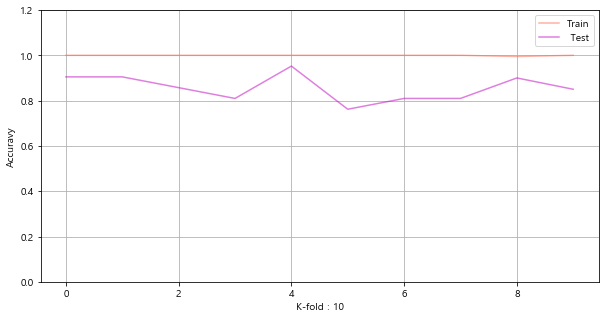

In [10]:
# 시각화.
plt.figure(figsize=(10,5))
plt.plot(Train_result_List, color='tomato', alpha=.5)
plt.plot(Test_result_List, color='m', alpha=.5)
plt.legend(['Train',' Test'])
plt.xlabel('K-fold : 10')
plt.ylabel('Accuravy')
plt.ylim(0, 1.2)
plt.grid()
plt.show()